<a href="https://colab.research.google.com/github/ruthujapatil/ruthujapatil/blob/main/Salary_Assignment_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('/content/SalaryData_Train(1).csv')

In [ ]:
test=pd.read_csv('/content/SalaryData_Test(1).csv')

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


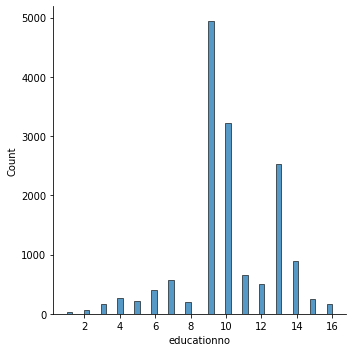

In [ ]:
sns.displot(test['educationno'])

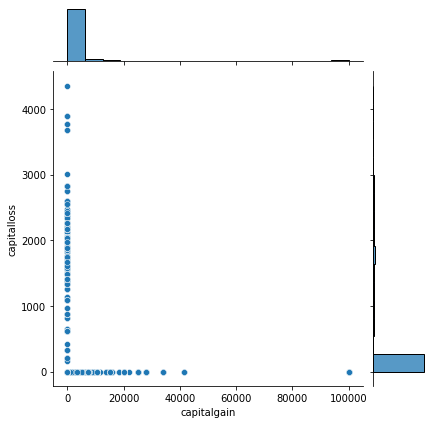

In [ ]:
sns.jointplot(data=train,x='capitalgain',y='capitalloss')

In [ ]:
train.shape , test.shape

((30161, 14), (15060, 14))

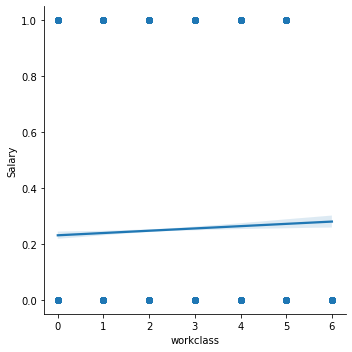

In [ ]:
import seaborn as sns
sns.lmplot(data=train,x='workclass',y='Salary')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
str_values_columns=[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

In [ ]:
#Encoding categorical data 
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in str_values_columns:
  train[i]=label.fit_transform(train[i])
  test[i]=label.fit_transform(test[i])

In [ ]:
X_train=train.iloc[:,0:13].values
y_train=train.iloc[:,13].values
X_test=test.iloc[:,0:13].values
y_test=test.iloc[:,13].values

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.svm import SVC  #fitting the model
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score #create confusion matrics and get accuracy score
cm=confusion_matrix(y_test,y_pred)      #accuracy
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[10703   657]
 [ 1664  2036]]
0.845883134130146
